## Simulation of the dynamics of <span style="color:deeppink">Argon </span> and <span style="color:deepskyblue"> Krypton </span> under different thermodynamical conditions


The aim of this exercise was to simulate the dynamics and the thermodynamics of a small number of particles (108) in the framework of the microcanonical ensemble (also known as NVE, referencing to the quantites held constant). The particles interaction was a Lennard-Jones potential of the form

$$
v_{LJ}(r) = 4 \Big[ \Big(\frac{1}{r}\Big)^{12} - \Big(\frac{1}{r}\Big)^{6} \Big]
$$


##### Observation
In specyfing the potential we have used reduced units $\epsilon = 1,  \sigma = 1$. 
In other words we are measuring energy in units of $\epsilon$ and lenghts in units of $\sigma$. By the way, by measuring mass with the mass of the particle, we can express the unit of measurment of any physical quantity. In particulare we will use the following:

|Quantity     |    Unit of measurement|
|:--|:-- |
|Energy|$\epsilon$|
|Lenght|$\sigma$|
|Mass|$m$|
|Time|$\sigma m^{1/2} \epsilon^{-1/2}$|
|Temperature|$\epsilon/k_b$|
|Number density|$\sigma^{-3}$|
|Pressure|$\epsilon \sigma^{-3}$|
|Velocity|$\epsilon^{1/2}m^{-1/2}$|


The importance of this method is that it enhances generality: by absorbing the physical constants inside the variables we are not just simulating one system, but an infinite family of systems, each viewed at a different scale (of time, lenght, energy, ...). Plus, reduced units are the natural units, in the sense that are the "computationally optimal" units to study the physical problem: this implies that all quantities should have a numerical value of order ~$1$ when expressed in this units.

### The code

We used the Verlet algorithm to integrate Newton's equations for $10^4$ time steps, with a single step being 0.0005 (see table below for the corrisponding "physical time"). This choice was made to grant the "smoothness" in the movement of the particles.
The simulations were confined in boxes of different sizes, depending on the thermodynamic state, and periodic boundary conditions were implemented.


### The quantities 

We have calculated the istantaneous and the average values of different thermodynamical observables. We will present the results by plotting this functions with time and we will check the physical foundation of each one. For example we should always see the conservation of the total energy during our simulations, this being a feature of the Verlet algorithm.

The quantities we considered are, in reduced units:
- $Potential \space energy, \space\space U = \sum_{i = 1}^{N-1} \sum_{j = i+1}^N v_{LJ}(|r_i - r_j|)$
- $Kinetic \space energy, \space \space K = \frac{1}{2}\sum_{i = 1}^N \dot{r_i}^2$
- $Total \space energy, \space \space E = K + U$
- $Istantaneous \space temperature, \space \space T = \frac{2}{3}\frac{K}{N}$
- $Istantaneous \space pressure, \space \space P = n T + \frac{1}{3V}\sum_{i = 1}^{N-1} \sum_{j = i+1}^N 48 \Big[ \Big(\frac{1}{r}\Big)^{12} - \frac{1}{2}\Big(\frac{1}{r}\Big)^{6} \Big]$

We will have to convert any number we get from the simulation into a quantity measured in SI units, and this will be done by multiplying the quantity for the corresponding unit of measurment in the table above.


### The thermodynamical conditions

We studied the system in 3 different thermodynamical condition, corresponding to 3 different $\textit{phases}$, namely the gaseous, the liquid and the solid phase. This was done by controlling 3 main parameters: the temperature, the mean density and the cut-off radius.
Specifically, in our simulations we had (quantities are in natural units):

$$
Solid \;\;\; T = 0.8, \; \rho = 1.1, \; r_{cut} = 2.2
$$

$$
Liquid \;\;\; T = 1.1, \; \rho = 0.8, \; r_{cut} = 2.5
$$

$$
Gas \;\;\; T = 1.2, \; \rho = 0.05, \; r_{cut} = 5
$$

Controlling the mean density is easy, since we restricted our 108 particles in a box and we actually set the box's volume in order to match the required density. 

The temperature is trickier, since, as specified above, it depends on the mean kinetic energy and so on the dynamics. Tipically what happened was that, depending on the initial conditions, in the first stages of the simulation the temperature varied, but after some steps of integration it reached an approximally constant value: this is referred to as the $\textit{equilibration phase}$ of the system. In order to match the system's actual temperature with the temperature we want the simulation to run at we could then do one of the following:
- by knowing the typical behaviour of our system, by trial-and-error we could find an initial temperature the would naturally evolve in the desired one after the first stages of the simulation
- implement a way to periodically change velocities, so that the system's kinetic energy matches the desired value provided from the equipartition theorem ($3/2 T$), and the poistion of the particles so that they are again physically consistent with the new velocities.

The road we followed was the last one. More details on this will follow in the next sections.

The $\textit{cut-off radius}$ is a quantity which become necessary if one is simulating a system of iteracting particle in PBC, as we were. It essentially sets the maximum range of the interaction so that two particle whose distance is greater than $r_{cut}$ will not feel each other presence. We see by its definition that the cut-off radius inevitably brings some approximations into the model.

### The results

In order to shorten the lenght of each example we have separated the results of various simulations in the following manner:
- $\textbf{in this jupyter}$ you will find, apart from the previous introductory part, some consideration on the equilibration of the various phases, as explained above, with particular attention to the gas
- in the directories $\textbf{Gas}$, $\textbf{Liquid}$ and $\textbf{Solid}$ you will find the results for the simulations of the 3 different phases, i.e. the average values of all the thermodynamical quantities mentioned above, with their errors, as functions of the number of blocks, as usual; you'll also find the corresponding SI quantities
- finally, in the directory $\textbf{G_of_R}$ you will find one short notebook explaining and presenting results of the calculation of the $\textit{radial distribution function } g(r)$ for the 3 phases.

Note that a "sequential reading" is not mandatory, but it will certainly be useful in following the author's reasoning.

### The equilibration phase

As mentioned above, we implemented in our code what could be called a "forced" equilibration, actively partecipating in our system's dynamics in order to obtain the desired conditions. But this was not at all always necessary: we'll see that the 3 different phases behave in a very different way, so that the equilibration could take up different amounts of time to be completed. Let's start with the simple case.

#### Solid equilibration

To simulate a solid, good starting points for the particles are the position on a regular lattice. We then started from an fcc configuration. We will focus only on the potential energy, the total energy and the temperature. Also, since the units of measurment don't play any role here, we'll leave the quantities in natural units.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

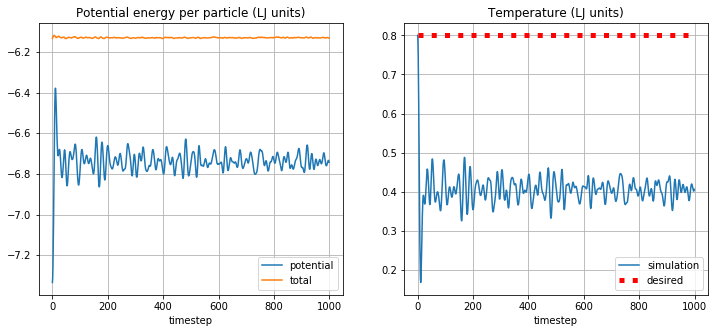

In [2]:
# Loading istantaneous values
ist_values = [ np.loadtxt("Equilibration/SOLID/output_epot(0).dat"),
 np.loadtxt("Equilibration/SOLID/output_etot(0).dat"), 
 np.loadtxt("Equilibration/SOLID/output_temp(0).dat")]

# setting names for plots
attr = ['Potential energy per particle (LJ units)',
        'Total energy per particle (LJ units)',
       'Temperature (LJ units)']

N = len(ist_values[0])
n = np.arange(N)

f = plt.figure(figsize = (12, 5))
# Plotting potential and total energy together
f.add_subplot(1, 2, 1)
plt.plot(n , ist_values[0], label = 'potential')
plt.plot(n , ist_values[1], label = 'total')
plt.xlabel('timestep')
plt.title(attr[0])
plt.grid(True)
plt.legend()

# Plotting temperature
f.add_subplot(1, 2, 2)
plt.plot(n , ist_values[2], label = 'simulation')
plt.plot(n, np.ones(N)*0.8, linestyle = 'dotted', linewidth = 5, c = 'r', label = 'desired')
plt.xlabel('timestep')
plt.title(attr[2])
plt.grid(True)
plt.legend()


Those plots contain istantaneous values of potential energy, total energy and temperature. The timestep here correspond to $10$ integration steps. What we are interested in here is noting that the solid goes rapidly into equilibrium, bringing its temperature from the intial value of $0.8$ down to $0.2$, and then quickly going up and settle to arounf $T = 0.4$. Now let's see what happened when weturned on our forced equilibration alogithm.

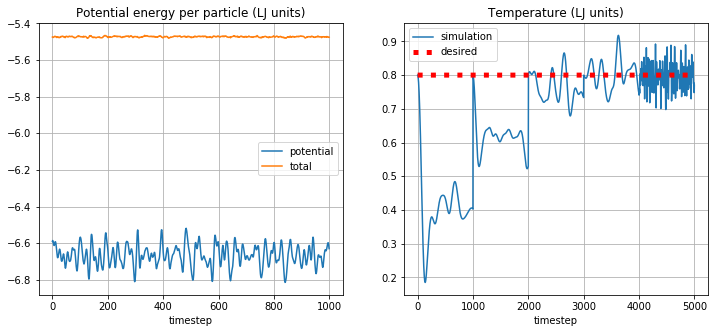

In [3]:
# Loading istantaneous values
ist_values = [ np.loadtxt("Equilibration/SOLID/output_epot_eq(0).dat"),
 np.loadtxt("Equilibration/SOLID/output_etot_eq(0).dat"), 
 np.loadtxt("Equilibration/SOLID/output_temp_eq(0).dat")]

# setting names for plots
attr = ['Potential energy per particle (LJ units)',
        'Total energy per particle (LJ units)',
       'Temperature (LJ units)']

N = len(ist_values[0])
n = np.arange(N)

f = plt.figure(figsize = (12, 5))
# Plotting potential and total energy together
f.add_subplot(1, 2, 1)
plt.plot(n , ist_values[0], label = 'potential')
plt.plot(n , ist_values[1], label = 'total')
plt.xlabel('timestep')
plt.title(attr[0])
plt.grid(True)
plt.legend()
N = len(ist_values[2])
n = np.arange(N)

# Plotting temperature
f.add_subplot(1, 2, 2)
plt.plot(n , ist_values[2], label = 'simulation')
plt.plot(n, np.ones(N)*0.8, linestyle = 'dotted', linewidth = 5, c = 'r', label = 'desired')
plt.xlabel('timestep')
plt.title(attr[2])
plt.legend()
plt.grid(True)

In this case we measured only the temperature variation through the equilibration phase (on the right), while the potential and total energy (left) are plotted just for the actual $10^4$ step simulation. The interesting plot is the one on the right. First we should note that the graph has 2 scales: from $0$ to $4000$ the timestep is the actual step of integration, while from this point to $5000$ the timestep correspond, as in the left plot and before, to $10$ integration steps. This was done just to expose more clearly the effects of the forced equilibration: one can recognize that for $4$ times we forced the system to change his temperature to $0.8$, and we then let it evolve for $1000$ integration steps. We see that after $3$ enforcings the solid has already reached a satisfactory equilibrium at approximately $T = 0.8$.

#### Liquid equilibration

We can now repeat the scheme for the liquid phase. A good starting point is the previous configuration, the one in which the particles were at the end of the solid simulation. Let's see first what would be the "natural" equilibration of the liquid phase.

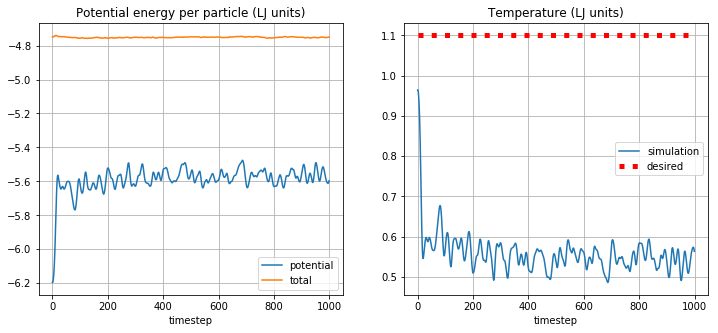

In [4]:
# Loading istantaneous values
ist_values = [ np.loadtxt("Equilibration/LIQUID/output_epot(0).dat"),
 np.loadtxt("Equilibration/LIQUID/output_etot(0).dat"), 
 np.loadtxt("Equilibration/LIQUID/output_temp(0).dat")]

# setting names for plots
attr = ['Potential energy per particle (LJ units)',
        'Total energy per particle (LJ units)',
       'Temperature (LJ units)']

N = len(ist_values[0])
n = np.arange(N)

f = plt.figure(figsize = (12, 5))
# Plotting potential and total energy together
f.add_subplot(1, 2, 1)
plt.plot(n , ist_values[0], label = 'potential')
plt.plot(n , ist_values[1], label = 'total')
plt.xlabel('timestep')
plt.title(attr[0])
plt.grid(True)
plt.legend()

# Plotting total energy
f.add_subplot(1, 2, 2)
plt.plot(n , ist_values[2], label= 'simulation')
plt.plot(n, np.ones(N)*1.1, linestyle = 'dotted', linewidth = 5, c = 'r', label = 'desired')
plt.xlabel('timestep')
plt.title(attr[2])
plt.grid(True)
plt.legend()


The ovreall appearance in this case is similar to that of the solid, albeit there is an interesting difference: after a quick drop in the temperature, there is a slow, almost $4000$ step long trend that reduces again the temperature. This trend can be seen as a signal of the correlations that occurr in the liquid phase.  

Just as for the solid, let's now study the effects of the forced equilibration.

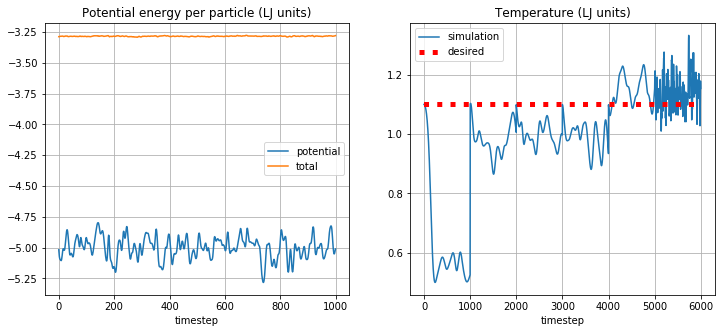

In [5]:
# Loading istantaneous values
ist_values = [ np.loadtxt("Equilibration/LIQUID/output_epot_eq(0).dat"),
 np.loadtxt("Equilibration/LIQUID/output_etot_eq(0).dat"), 
 np.loadtxt("Equilibration/LIQUID/output_temp_eq(0).dat")]

# setting names for plots
attr = ['Potential energy per particle (LJ units)',
        'Total energy per particle (LJ units)',
       'Temperature (LJ units)']

N = len(ist_values[0])
n = np.arange(N)

f = plt.figure(figsize = (12, 5))
# Plotting potential and total energy together
f.add_subplot(1, 2, 1)
plt.plot(n , ist_values[0], label = 'potential')
plt.plot(n , ist_values[1], label = 'total')
plt.xlabel('timestep')
plt.title(attr[0])
plt.grid(True)
plt.legend()
N = len(ist_values[2])
n = np.arange(N)

# Plotting total energy
f.add_subplot(1, 2, 2)
plt.plot(n , ist_values[2], label = 'simulation')
plt.plot(n, np.ones(N)*1.1, linestyle = 'dotted', linewidth = 5, c = 'r', label = 'desired')
plt.xlabel('timestep')
plt.title(attr[2])
plt.grid(True)
plt.legend()

Again leftplot representjust the potential and total energies $after$ the equilibration phase, while the steps of forced equilibration are present in right plot: after the first drop, the initial temperature of $1.1$ is imposed again to the liquid, and for other 2 times the system doesn't seem to "understand" the temperature we are forcing upon him. This may simply be a consequence of the distance between subsequent forcing events ($1000$ integration steps, as for the solid), which is to short to show the improvement. Anyway, in accordance to the empirical rule "third time's a charm", at the 3rd forcing event the liquid bring itself to the almost-right temperature, and after a final step the simulation starts at approximately $T = 1.1$.

#### Gas equilibration

Finally, the gas case. Again we started the particles from the positions where the previous simulation ended. 

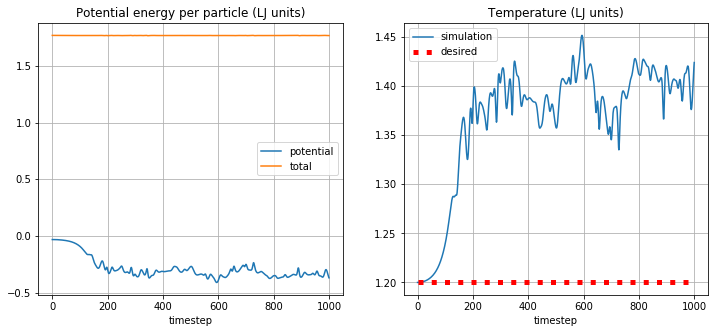

In [15]:
# Loading istantaneous values
ist_values = [ np.loadtxt("Equilibration/GAS/output_epot(0).dat"),
 np.loadtxt("Equilibration/GAS/output_etot(0).dat"), 
 np.loadtxt("Equilibration/GAS/output_temp(0).dat")]

# setting names for plots
attr = ['Potential energy per particle (LJ units)',
        'Total energy per particle (LJ units)',
       'Temperature (LJ units)']

N = len(ist_values[0])
n = np.arange(N)

f = plt.figure(figsize = (12, 5))
# Plotting potential and total energy together
f.add_subplot(1, 2, 1)
plt.plot(n , ist_values[0], label = 'potential')
plt.plot(n , ist_values[1], label = 'total')
plt.xlabel('timestep')
plt.title(attr[0])
plt.grid(True)
plt.legend()
N = len(ist_values[2])
n = np.arange(N)

# Plotting total energy
f.add_subplot(1, 2, 2)
plt.plot(n , ist_values[2], label= 'simulation')
plt.plot(n, np.ones(N)*1.2, linestyle = 'dotted', linewidth = 5, c = 'r', label = 'desired')
plt.xlabel('timestep')
plt.title(attr[2])
plt.grid(True)
plt.legend()


The difference between the other cases and this one is twofold: first, the natural equilibration is much slower in the gas phase, still going on after $2000$ integration steps; second, here the temperature $\textit{increases}$ as the system evoles. Both of this aspects find a common explanation in the fact that, being almost 10 times more sparse than its neighbouring liquid phase, gas particles (1) interacts with a much slower rate and (2) find themeselves initially far from the minimum of the potential, in a zone where the intearction is attractive, so they move in a way that naturally $\textit{decreases}$ their potential energy as can clearly be seen in the left plot. As a consequence of the conservation of total energy, kinetic energy grows, and so does temperature. 

Let's now find out what happens if we force a temperature upon the gas. 

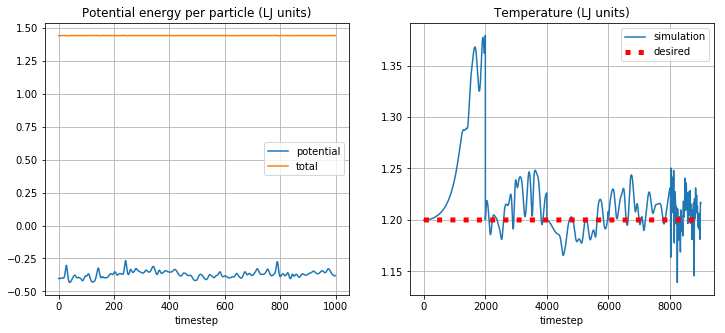

In [14]:
# Loading istantaneous values
ist_values = [ np.loadtxt("Equilibration/GAS/output_epot_eq(0).dat"),
 np.loadtxt("Equilibration/GAS/output_etot_eq(0).dat"), 
 np.loadtxt("Equilibration/GAS/output_temp_eq(0).dat")]

# setting names for plots
attr = ['Potential energy per particle (LJ units)',
        'Total energy per particle (LJ units)',
       'Temperature (LJ units)']

N = len(ist_values[0])
n = np.arange(N)

f = plt.figure(figsize = (12, 5))
# Plotting potential and total energy together
f.add_subplot(1, 2, 1)
plt.plot(n , ist_values[0], label = 'potential')
plt.plot(n , ist_values[1], label = 'total')
plt.xlabel('timestep')
plt.title(attr[0])
plt.grid(True)
plt.legend()
N = len(ist_values[2])
n = np.arange(N)

# Plotting total energy
f.add_subplot(1, 2, 2)
plt.plot(n , ist_values[2], label = 'simulation')
plt.plot(n, np.ones(N)*1.2, linestyle = 'dotted', linewidth = 5, c = 'r', label = 'desired')
plt.xlabel('timestep')
plt.title(attr[2])
plt.grid(True)
plt.legend()

The fluctiations in the gas phase are stronger, making it harder to determine if and how an equilibrium temperature has been reached. Nonetheless we can be satisfied with the results in the right plot: the gas oscillates very near the desired temperature $T = 1.2$. Here the inetegration steps between subsequent forcing events were chosen to be $2000$, twice as in the other cases to better show the generaltrend of the curve.

### Results

What we found in this part of the exercise will be useful in the next part: actually, this was the hardest part, because having determined $\textit{how}$ to bring the system to equilibrium at a certain temperature, the only thing left to do is to collect values and averages of quantities during the simulations. Summarising our "experimentally" determined procedures to equilibrate the 3 phases we may consider a table of this form

|Phase     |    How many| Int. steps
|:--|:--  |:--  |
|Solid|3|1000|
|Liquid|4|1000|
|Gas|4|2000|

Obviously these are "lower bounds" meaning that a longer equilibration will equally do the job.

### Coming up

We suggest to continue the reading either jumping to the notebook "Radial distribution function" in directory "G_of_R", or to go on with molecular dynamics code and start with "Argon gas" notebook in directory "Gas".